In [31]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorly.random as tl_rand
import tensorly.kruskal_tensor as tl_kruskal
import numpy as np
import time

from BLOCK_SPG_CPD import bras_CPD
from BLOCK_SPG_CPD import ada_CPD

In [32]:
# Set up
rank = 100
A_true = tl_rand.random_kruskal((300,300,300), rank, full=False)
X = tl_kruskal.kruskal_to_tensor(A_true)
B = 20
b = 10**-6
eps = 0
eta = 1
num_iterations = 30*5000

In [33]:
# Run ada_CPD update
A, cost, mse = ada_CPD(A_true, X, rank, B, eta, b, eps, num_iterations)

Iteration: 999
Iteration: 1999
Iteration: 2999
Iteration: 3999
Iteration: 4999
Iteration: 5999
Iteration: 6999
Iteration: 7999
Iteration: 8999
Iteration: 9999
Iteration: 10999
Iteration: 11999
Iteration: 12999
Iteration: 13999
Iteration: 14999
Iteration: 15999
Iteration: 16999
Iteration: 17999
Iteration: 18999
Iteration: 19999
Iteration: 20999
Iteration: 21999
Iteration: 22999
Iteration: 23999
Iteration: 24999
Iteration: 25999
Iteration: 26999
Iteration: 27999
Iteration: 28999
Iteration: 29999
Iteration: 30999
Iteration: 31999
Iteration: 32999
Iteration: 33999
Iteration: 34999
Iteration: 35999
Iteration: 36999
Iteration: 37999
Iteration: 38999
Iteration: 39999
Iteration: 40999
Iteration: 41999
Iteration: 42999
Iteration: 43999
Iteration: 44999
Iteration: 45999
Iteration: 46999
Iteration: 47999
Iteration: 48999
Iteration: 49999
Iteration: 50999
Iteration: 51999
Iteration: 52999
Iteration: 53999
Iteration: 54999
Iteration: 55999
Iteration: 56999
Iteration: 57999
Iteration: 58999
Iteratio

In [34]:
# Save data
np.save("cost_ada.txt", cost)
np.save("mse_ada.txt", mse)

<Figure size 432x288 with 0 Axes>

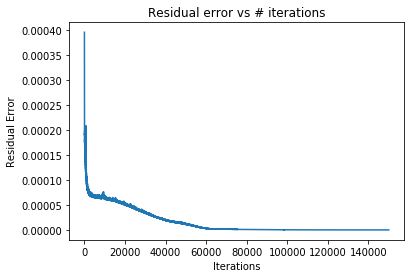

<Figure size 432x288 with 0 Axes>

In [35]:
x = range(150001)
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, cost)  
plt.figure()

<Figure size 432x288 with 0 Axes>

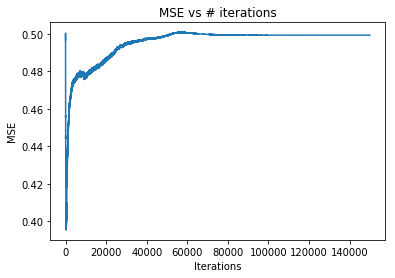

<Figure size 432x288 with 0 Axes>

In [36]:
x = range(150001)
plt.title('MSE vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(x, mse)  
plt.figure()

In [37]:
# Set up
rank = 100
A_true = tl_rand.random_kruskal((300,300,300), rank, full=False)
X = tl_kruskal.kruskal_to_tensor(A_true)
alphas = [0.1, 0.05, 0.01]
B = 20
beta = 10**-6
num_iterations = 30*5000

In [38]:
# Run bras_cpd update
costs = []
mses = []
for alpha in alphas:
    A, error, mse = bras_CPD(A_true, X, rank, B, alpha, beta, num_iterations)
    costs.append(error)
    mses.append(mse)

Iteration: 999
Iteration: 1999
Iteration: 2999
Iteration: 3999
Iteration: 4999
Iteration: 5999
Iteration: 6999
Iteration: 7999
Iteration: 8999
Iteration: 9999
Iteration: 10999
Iteration: 11999
Iteration: 12999
Iteration: 13999
Iteration: 14999
Iteration: 15999
Iteration: 16999
Iteration: 17999
Iteration: 18999
Iteration: 19999
Iteration: 20999
Iteration: 21999
Iteration: 22999
Iteration: 23999
Iteration: 24999
Iteration: 25999
Iteration: 26999
Iteration: 27999
Iteration: 28999
Iteration: 29999
Iteration: 30999
Iteration: 31999
Iteration: 32999
Iteration: 33999
Iteration: 34999
Iteration: 35999
Iteration: 36999
Iteration: 37999
Iteration: 38999
Iteration: 39999
Iteration: 40999
Iteration: 41999
Iteration: 42999
Iteration: 43999
Iteration: 44999
Iteration: 45999
Iteration: 46999
Iteration: 47999
Iteration: 48999
Iteration: 49999
Iteration: 50999
Iteration: 51999
Iteration: 52999
Iteration: 53999
Iteration: 54999
Iteration: 55999
Iteration: 56999
Iteration: 57999
Iteration: 58999
Iteratio

In [39]:
# Save error/mse/A
np.save("cost_bras.txt", np.array(costs))
np.save("mse_bras.txt", np.array(mses))

In [40]:
costs = np.load("cost_bras.txt.npy")
mses = np.load("mse_bras.txt.npy")

<Figure size 432x288 with 0 Axes>

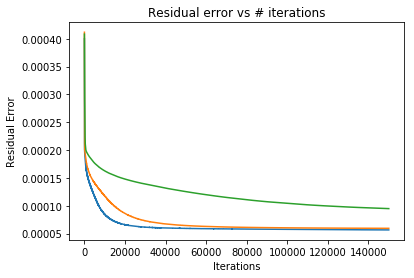

<Figure size 432x288 with 0 Axes>

In [41]:
for i in range(3):
    x = range(150001)
    plt.title('Residual error vs # iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Residual Error')
    plt.plot(x, costs[i])  
plt.figure()

<Figure size 432x288 with 0 Axes>

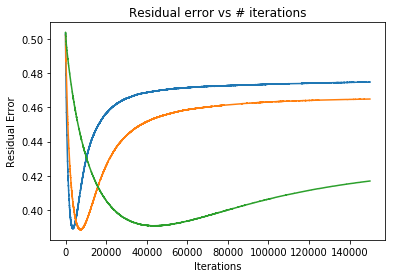

<Figure size 432x288 with 0 Axes>

In [42]:
for i in range(3):
    x = range(150001)
    plt.title('Residual error vs # iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Residual Error')
    plt.plot(x, mses[i])  
plt.figure()